In [1]:
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds
from PW_explorer.pwe_helper import rel_slicer
from PW_explorer.time_series import PWETimeSeriesModule
from PW_explorer.pwe_nb_helper import ASPRules
from PW_explorer.export import PWEExport
from PW_explorer.visualize import PWEVisualization

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
from copy import deepcopy
from collections import OrderedDict

import csv

In [2]:
%load_ext PWE_NB_Extension

In [3]:
testData = '/home/mj1e16/abduction/pwe/testData/qfix_synthetic_example/synth_1_dirty_0.csv'
testQueries = '/home/mj1e16/abduction/pwe/testData/qfix_synthetic_example/qlog_clean.csv'

In [4]:
dataSet = []
with open(testData,'r') as csvfile:
    reader = csv.reader(csvfile,delimiter=' ',quotechar='|')
    for row in reader:
        dataSet.append([', '.join(row)])

In [42]:
schema_nodes = ['row'+str(i) for i in range(len(dataSet)-1)]
schema_edges = ['% schema e(data('+','.join(schema_nodes)+'),data('+','.join(schema_nodes)+'),trans)']
clingo_rules = ['% schema data('+','.join(schema_nodes)+')']
clingo_rules.extend(schema_edges)

In [43]:
clingo_rules

['% schema data(row0,row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15,row16,row17,row18,row19,row20,row21,row22,row23,row24,row25,row26,row27,row28,row29,row30,row31,row32,row33,row34,row35,row36,row37,row38,row39,row40,row41,row42,row43,row44,row45,row46,row47,row48,row49)',
 '% schema e(data(row0,row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15,row16,row17,row18,row19,row20,row21,row22,row23,row24,row25,row26,row27,row28,row29,row30,row31,row32,row33,row34,row35,row36,row37,row38,row39,row40,row41,row42,row43,row44,row45,row46,row47,row48,row49),data(row0,row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15,row16,row17,row18,row19,row20,row21,row22,row23,row24,row25,row26,row27,row28,row29,row30,row31,row32,row33,row34,row35,row36,row37,row38,row39,row40,row41,row42,row43,row44,row45,row46,row47,row48,row49),trans)']

In [44]:
def makeOriginal(dataValues,colour='black'):
    clingoStart = []
    clingoStart = ['row'+str(i)+'('+','.join(x)+')' for i,x in enumerate(dataValues)]
    clingoStartNew = 'data('+','.join(clingoStart)+').'
    return clingoStartNew

In [45]:
originalSetup = makeOriginal(dataSetOnly)

In [46]:
ASPRules(originalSetup)

'data(row0(0,13,85,77,27,52,48),row1(1,65,79,11,5,85,46),row2(2,76,1,46,73,26,95),row3(3,91,4,4,56,95,41),row4(4,21,43,4,24,46,52),row5(5,23,24,23,48,32,7),row6(6,84,56,65,21,100,87),row7(7,12,34,73,72,94,45),row8(8,83,68,32,60,89,86),row9(9,51,59,5,26,81,44),row10(10,17,55,71,69,40,47),row11(11,51,78,53,41,51,7),row12(12,4,71,99,61,42,21),row13(13,50,99,78,55,87,27),row14(14,51,96,59,47,30,57),row15(15,96,1,79,83,89,76),row16(16,81,52,57,44,9,88),row17(17,57,20,51,50,38,38),row18(18,54,63,62,47,6,27),row19(19,17,59,87,81,81,83),row20(20,25,85,68,11,5,6),row21(21,76,25,12,64,37,11),row22(22,16,53,18,29,73,48),row23(23,32,48,4,40,44,23),row24(24,10,90,52,23,62,83),row25(25,2,2,16,73,19,72),row26(26,68,55,23,98,81,54),row27(27,22,65,41,59,35,65),row28(28,5,30,97,88,33,87),row29(29,31,94,75,43,28,5),row30(30,88,4,83,97,59,21),row31(31,87,98,71,52,40,38),row32(32,20,68,44,22,14,68),row33(33,29,50,34,88,91,6),row34(34,20,33,99,79,36,25),row35(35,68,84,94,36,89,70),row36(36,48,99,25,74,12,21),row37(37,92,22,77,61,85,40),row38(38,34,30,87,62,96,90),row39(39,13,56,12,6,11,88),row40(40,79,83,35,63,79,41),row41(41,57,23,10,29,90,59),row42(42,93,46,29,80,84,6),row43(43,67,10,13,89,7,28),row44(44,99,43,13,19,27,76),row45(45,10,92,39,98,92,33),row46(46,25,48,11,66,7,6),row47(47,99,30,61,47,34,11),row48(48,92,97,98,13,24,64),row49(49,98,55,70,67,29,56)).'

In [41]:
with open(testQueries,'r') as f:
    data = f.read()
print(data)    
queries = data.split('\n')
print(queries)

query
"UPDATE synth_1_clean_0 SET a1 = 95, a2 = 91 WHERE a1 = 3 AND a5 = 2"
"UPDATE synth_1_clean_1 SET a1 = 38, a2 = 21 WHERE a1 >= 38 AND a1 < 48 AND a4 >= 2 AND a4 < 12"
"INSERT INTO synth_1_clean_2 VALUES(50,44,50,23,23,22,46)"
"INSERT INTO synth_1_clean_3 VALUES(51,2,84,56,64,18,100)"
"UPDATE synth_1_clean_4 SET a1 = 33, a2 = 72 WHERE a1 = 71 AND a5 = 94"
"UPDATE synth_1_clean_5 SET a1 = 67, a2 = 30 WHERE a1 >= 53 AND a1 < 63 AND a4 >= 80 AND a4 < 90"
"UPDATE synth_1_clean_6 SET a1 = 59, a2 = 3 WHERE a1 >= 22 AND a1 < 32 AND a4 >= 72 AND a4 < 82"
"UPDATE synth_1_clean_7 SET a1 = 55, a2 = 71 WHERE a1 = 68 AND a5 = 37"
"UPDATE synth_1_clean_8 SET a1 = 78, a2 = 52 WHERE a1 >= 35 AND a1 < 45 AND a4 >= 44 AND a4 < 54"
"INSERT INTO synth_1_clean_9 VALUES(52,4,71,99,59,39,17)"

['query', '"UPDATE synth_1_clean_0 SET a1 = 95, a2 = 91 WHERE a1 = 3 AND a5 = 2"', '"UPDATE synth_1_clean_1 SET a1 = 38, a2 = 21 WHERE a1 >= 38 AND a1 < 48 AND a4 >= 2 AND a4 < 12"', '"INSERT INTO synth_1_clean_2 

In [56]:
def sql2clingo(sqlCommand,originalSchema,dataSet,colour='black'):
    sql = sqlCommand.replace('"','')
    sqlList = sql.split(' ') 
    schemaList = originalSchema.split(',')
    clingoString = 0
    print(sqlList[0])
    if sqlList[0] == 'UPDATE':
        sql = sql.replace(' = ','=')
        sql = sql.replace(' > ','>')
        sql = sql.replace(' < ','<')
        sql = sql.replace(' >= ','>=')
        sql = sql.replace(' <= ','<=')
        sql = sql.replace(',','')
        sqlList = sql.split(' ') 
        setLoc = sqlList.index('SET')
        whereLoc = sqlList.index('WHERE')
        setCommands = sqlList[setLoc+1:whereLoc]
        setCommands = [x.upper() for x in setCommands]
        whereCommands = sqlList[whereLoc+1:]
        whereCommands = [x.upper() for x in whereCommands if x != 'AND']
        whereCommandsString = '-'.join(whereCommands)
        whereCommandsComma = ','.join(whereCommands)
        setLocs = [x[:x.index('=')] for x in setCommands]
        setValues = [x[x.index('=')+1:] for x in setCommands]
        setVals = []
        startSetVals = []
        for x in (schemaList):
            if x in setLocs:
                loc = setLocs.index(x)
                setVals.append(setValues[loc])
                startSetVals.append('_')
            else:
                setVals.append(x)
                startSetVals.append(x)
        setValsString = ','.join(setVals)
        rowValuesSet = ['row'+str(i)+'('+setValsString+')' for i in range(len(dataSet)-1)]
        rowValuesOriginal = ['row'+str(i)+'('+originalSchema+')' for i in range(len(dataSet)-1)]
        clingoString = 'e(data('+','.join(rowValuesSet)+'),data('+','.join(rowValuesOriginal)+'),trans('+whereCommandsString+','+colour+')) :- data('+','.join(rowValuesOriginal)+'),'+whereCommandsComma+'.'
        
    if sqlList[0] == 'INSERT':
        locator = 'VALUES('
        loc1 = sql.index(locator)
        loc2 = sql[loc1:].index(')')+loc1
        datavalues = sql[loc1+len(locator):loc2]
        clingoString = 'data('+datavalues+',black,"-",'+datavalues+').'
    
    return clingoString

In [57]:
commands = []
for x in queries:
    clingoString = sql2clingo(x,originalSchema,dataSet)
    if clingoString != 0:
        commands.append(clingoString)
        
commands

query
UPDATE
UPDATE
INSERT
INSERT
UPDATE
UPDATE
UPDATE
UPDATE
UPDATE
INSERT



['e(data(row0(ID,A0,95,91,A3,A4,A5),row1(ID,A0,95,91,A3,A4,A5),row2(ID,A0,95,91,A3,A4,A5),row3(ID,A0,95,91,A3,A4,A5),row4(ID,A0,95,91,A3,A4,A5),row5(ID,A0,95,91,A3,A4,A5),row6(ID,A0,95,91,A3,A4,A5),row7(ID,A0,95,91,A3,A4,A5),row8(ID,A0,95,91,A3,A4,A5),row9(ID,A0,95,91,A3,A4,A5),row10(ID,A0,95,91,A3,A4,A5),row11(ID,A0,95,91,A3,A4,A5),row12(ID,A0,95,91,A3,A4,A5),row13(ID,A0,95,91,A3,A4,A5),row14(ID,A0,95,91,A3,A4,A5),row15(ID,A0,95,91,A3,A4,A5),row16(ID,A0,95,91,A3,A4,A5),row17(ID,A0,95,91,A3,A4,A5),row18(ID,A0,95,91,A3,A4,A5),row19(ID,A0,95,91,A3,A4,A5),row20(ID,A0,95,91,A3,A4,A5),row21(ID,A0,95,91,A3,A4,A5),row22(ID,A0,95,91,A3,A4,A5),row23(ID,A0,95,91,A3,A4,A5),row24(ID,A0,95,91,A3,A4,A5),row25(ID,A0,95,91,A3,A4,A5),row26(ID,A0,95,91,A3,A4,A5),row27(ID,A0,95,91,A3,A4,A5),row28(ID,A0,95,91,A3,A4,A5),row29(ID,A0,95,91,A3,A4,A5),row30(ID,A0,95,91,A3,A4,A5),row31(ID,A0,95,91,A3,A4,A5),row32(ID,A0,95,91,A3,A4,A5),row33(ID,A0,95,91,A3,A4,A5),row34(ID,A0,95,91,A3,A4,A5),row35(ID,A0,95,91,A3,

In [53]:
originalSchema

'ID,A0,A1,A2,A3,A4,A5'

In [209]:
commands = ['data(ID,A0,59,3,A3,A4,A5,black,"A1>=22-A1<32-A4>=72-A4<82",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5_,_,_,_,_,_,_),A1>=22,A4>=72.']

In [223]:
ASPRules('\n'.join(commands))

'data(ID,A0,95,91,A3,A4,A5,black,"A1=3-A5=2",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1=3,A5=2.\ndata(ID,A0,38,21,A3,A4,A5,black,"A1>=38-A1<48-A4>=2-A4<12",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1>=38,A1<48,A4>=2,A4<12.\ndata(50,44,50,23,23,22,46,black,"-",50,44,50,23,23,22,46).\ndata(51,2,84,56,64,18,100,black,"-",51,2,84,56,64,18,100).\ndata(ID,A0,33,72,A3,A4,A5,black,"A1=71-A5=94",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1=71,A5=94.\ndata(ID,A0,67,30,A3,A4,A5,black,"A1>=53-A1<63-A4>=80-A4<90",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1>=53,A1<63,A4>=80,A4<90.\ndata(ID,A0,59,3,A3,A4,A5,black,"A1>=22-A1<32-A4>=72-A4<82",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1>=22,A1<32,A4>=72,A4<82.\ndata(ID,A0,55,71,A3,A4,A5,black,"A1=68-A5=37",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1=68,A5=37.\ndata(ID,A0,78,52,A3,A4,A5,black,"A1>=35-A1<45-A4>=44-A4<54",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1>=35,A1<45,A4>=44,A4<54.\ndata(52,4,71,99,59,39,17,black,"-",52,4,71,99,59,39,17).'

In [186]:
sql = "INSERT INTO synth_1_clean_9 VALUES(52,4,71,99,59,39,17)"


In [187]:
sql2clingo(sql,originalSchema)

INSERT


'data(52,4,71,99,59,39,17,black,"-",52,4,71,99,59,39,17).'

In [188]:
def makeOriginal(dataValues,colour='black'):
    clingoStart = []
    for x in dataValues:
        clingoStart.append('data('+','.join(x)+',black,"-",'+','.join(x)+').')
    return clingoStart

In [189]:
originalSetup = makeOriginal(dataSetOnly)

In [190]:
ASPRules('\n'.join(originalSetup))

'data(0,13,85,77,27,52,48,black,"-",0,13,85,77,27,52,48).\ndata(1,65,79,11,5,85,46,black,"-",1,65,79,11,5,85,46).\ndata(2,76,1,46,73,26,95,black,"-",2,76,1,46,73,26,95).\ndata(3,91,4,4,56,95,41,black,"-",3,91,4,4,56,95,41).\ndata(4,21,43,4,24,46,52,black,"-",4,21,43,4,24,46,52).\ndata(5,23,24,23,48,32,7,black,"-",5,23,24,23,48,32,7).\ndata(6,84,56,65,21,100,87,black,"-",6,84,56,65,21,100,87).\ndata(7,12,34,73,72,94,45,black,"-",7,12,34,73,72,94,45).\ndata(8,83,68,32,60,89,86,black,"-",8,83,68,32,60,89,86).\ndata(9,51,59,5,26,81,44,black,"-",9,51,59,5,26,81,44).\ndata(10,17,55,71,69,40,47,black,"-",10,17,55,71,69,40,47).\ndata(11,51,78,53,41,51,7,black,"-",11,51,78,53,41,51,7).\ndata(12,4,71,99,61,42,21,black,"-",12,4,71,99,61,42,21).\ndata(13,50,99,78,55,87,27,black,"-",13,50,99,78,55,87,27).\ndata(14,51,96,59,47,30,57,black,"-",14,51,96,59,47,30,57).\ndata(15,96,1,79,83,89,76,black,"-",15,96,1,79,83,89,76).\ndata(16,81,52,57,44,9,88,black,"-",16,81,52,57,44,9,88).\ndata(17,57,20,51,50,38,38,black,"-",17,57,20,51,50,38,38).\ndata(18,54,63,62,47,6,27,black,"-",18,54,63,62,47,6,27).\ndata(19,17,59,87,81,81,83,black,"-",19,17,59,87,81,81,83).\ndata(20,25,85,68,11,5,6,black,"-",20,25,85,68,11,5,6).\ndata(21,76,25,12,64,37,11,black,"-",21,76,25,12,64,37,11).\ndata(22,16,53,18,29,73,48,black,"-",22,16,53,18,29,73,48).\ndata(23,32,48,4,40,44,23,black,"-",23,32,48,4,40,44,23).\ndata(24,10,90,52,23,62,83,black,"-",24,10,90,52,23,62,83).\ndata(25,2,2,16,73,19,72,black,"-",25,2,2,16,73,19,72).\ndata(26,68,55,23,98,81,54,black,"-",26,68,55,23,98,81,54).\ndata(27,22,65,41,59,35,65,black,"-",27,22,65,41,59,35,65).\ndata(28,5,30,97,88,33,87,black,"-",28,5,30,97,88,33,87).\ndata(29,31,94,75,43,28,5,black,"-",29,31,94,75,43,28,5).\ndata(30,88,4,83,97,59,21,black,"-",30,88,4,83,97,59,21).\ndata(31,87,98,71,52,40,38,black,"-",31,87,98,71,52,40,38).\ndata(32,20,68,44,22,14,68,black,"-",32,20,68,44,22,14,68).\ndata(33,29,50,34,88,91,6,black,"-",33,29,50,34,88,91,6).\ndata(34,20,33,99,79,36,25,black,"-",34,20,33,99,79,36,25).\ndata(35,68,84,94,36,89,70,black,"-",35,68,84,94,36,89,70).\ndata(36,48,99,25,74,12,21,black,"-",36,48,99,25,74,12,21).\ndata(37,92,22,77,61,85,40,black,"-",37,92,22,77,61,85,40).\ndata(38,34,30,87,62,96,90,black,"-",38,34,30,87,62,96,90).\ndata(39,13,56,12,6,11,88,black,"-",39,13,56,12,6,11,88).\ndata(40,79,83,35,63,79,41,black,"-",40,79,83,35,63,79,41).\ndata(41,57,23,10,29,90,59,black,"-",41,57,23,10,29,90,59).\ndata(42,93,46,29,80,84,6,black,"-",42,93,46,29,80,84,6).\ndata(43,67,10,13,89,7,28,black,"-",43,67,10,13,89,7,28).\ndata(44,99,43,13,19,27,76,black,"-",44,99,43,13,19,27,76).\ndata(45,10,92,39,98,92,33,black,"-",45,10,92,39,98,92,33).\ndata(46,25,48,11,66,7,6,black,"-",46,25,48,11,66,7,6).\ndata(47,99,30,61,47,34,11,black,"-",47,99,30,61,47,34,11).\ndata(48,92,97,98,13,24,64,black,"-",48,92,97,98,13,24,64).\ndata(49,98,55,70,67,29,56,black,"-",49,98,55,70,67,29,56).'

In [227]:
clingo_rules = ['% schema data('+endSchema+',COLOUR,TRANS,'+originalSchema+')']
clingo_rules.extend(originalSetup)
clingo_rules.extend(commands)


In [228]:
ASPRules('\n'.join(clingo_rules)) # A5 is unsafe but I don't know why

'% schema data(ENDID,ENDA0,ENDA1,ENDA2,ENDA3,ENDA4,ENDA5,COLOUR,TRANS,ID,A0,A1,A2,A3,A4,A5)\ndata(0,13,85,77,27,52,48,black,"-",0,13,85,77,27,52,48).\ndata(1,65,79,11,5,85,46,black,"-",1,65,79,11,5,85,46).\ndata(2,76,1,46,73,26,95,black,"-",2,76,1,46,73,26,95).\ndata(3,91,4,4,56,95,41,black,"-",3,91,4,4,56,95,41).\ndata(4,21,43,4,24,46,52,black,"-",4,21,43,4,24,46,52).\ndata(5,23,24,23,48,32,7,black,"-",5,23,24,23,48,32,7).\ndata(6,84,56,65,21,100,87,black,"-",6,84,56,65,21,100,87).\ndata(7,12,34,73,72,94,45,black,"-",7,12,34,73,72,94,45).\ndata(8,83,68,32,60,89,86,black,"-",8,83,68,32,60,89,86).\ndata(9,51,59,5,26,81,44,black,"-",9,51,59,5,26,81,44).\ndata(10,17,55,71,69,40,47,black,"-",10,17,55,71,69,40,47).\ndata(11,51,78,53,41,51,7,black,"-",11,51,78,53,41,51,7).\ndata(12,4,71,99,61,42,21,black,"-",12,4,71,99,61,42,21).\ndata(13,50,99,78,55,87,27,black,"-",13,50,99,78,55,87,27).\ndata(14,51,96,59,47,30,57,black,"-",14,51,96,59,47,30,57).\ndata(15,96,1,79,83,89,76,black,"-",15,96,1,79,83,89,76).\ndata(16,81,52,57,44,9,88,black,"-",16,81,52,57,44,9,88).\ndata(17,57,20,51,50,38,38,black,"-",17,57,20,51,50,38,38).\ndata(18,54,63,62,47,6,27,black,"-",18,54,63,62,47,6,27).\ndata(19,17,59,87,81,81,83,black,"-",19,17,59,87,81,81,83).\ndata(20,25,85,68,11,5,6,black,"-",20,25,85,68,11,5,6).\ndata(21,76,25,12,64,37,11,black,"-",21,76,25,12,64,37,11).\ndata(22,16,53,18,29,73,48,black,"-",22,16,53,18,29,73,48).\ndata(23,32,48,4,40,44,23,black,"-",23,32,48,4,40,44,23).\ndata(24,10,90,52,23,62,83,black,"-",24,10,90,52,23,62,83).\ndata(25,2,2,16,73,19,72,black,"-",25,2,2,16,73,19,72).\ndata(26,68,55,23,98,81,54,black,"-",26,68,55,23,98,81,54).\ndata(27,22,65,41,59,35,65,black,"-",27,22,65,41,59,35,65).\ndata(28,5,30,97,88,33,87,black,"-",28,5,30,97,88,33,87).\ndata(29,31,94,75,43,28,5,black,"-",29,31,94,75,43,28,5).\ndata(30,88,4,83,97,59,21,black,"-",30,88,4,83,97,59,21).\ndata(31,87,98,71,52,40,38,black,"-",31,87,98,71,52,40,38).\ndata(32,20,68,44,22,14,68,black,"-",32,20,68,44,22,14,68).\ndata(33,29,50,34,88,91,6,black,"-",33,29,50,34,88,91,6).\ndata(34,20,33,99,79,36,25,black,"-",34,20,33,99,79,36,25).\ndata(35,68,84,94,36,89,70,black,"-",35,68,84,94,36,89,70).\ndata(36,48,99,25,74,12,21,black,"-",36,48,99,25,74,12,21).\ndata(37,92,22,77,61,85,40,black,"-",37,92,22,77,61,85,40).\ndata(38,34,30,87,62,96,90,black,"-",38,34,30,87,62,96,90).\ndata(39,13,56,12,6,11,88,black,"-",39,13,56,12,6,11,88).\ndata(40,79,83,35,63,79,41,black,"-",40,79,83,35,63,79,41).\ndata(41,57,23,10,29,90,59,black,"-",41,57,23,10,29,90,59).\ndata(42,93,46,29,80,84,6,black,"-",42,93,46,29,80,84,6).\ndata(43,67,10,13,89,7,28,black,"-",43,67,10,13,89,7,28).\ndata(44,99,43,13,19,27,76,black,"-",44,99,43,13,19,27,76).\ndata(45,10,92,39,98,92,33,black,"-",45,10,92,39,98,92,33).\ndata(46,25,48,11,66,7,6,black,"-",46,25,48,11,66,7,6).\ndata(47,99,30,61,47,34,11,black,"-",47,99,30,61,47,34,11).\ndata(48,92,97,98,13,24,64,black,"-",48,92,97,98,13,24,64).\ndata(49,98,55,70,67,29,56,black,"-",49,98,55,70,67,29,56).\ndata(ID,A0,95,91,A3,A4,A5,black,"A1=3-A5=2",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1=3,A5=2.\ndata(ID,A0,38,21,A3,A4,A5,black,"A1>=38-A1<48-A4>=2-A4<12",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1>=38,A1<48,A4>=2,A4<12.\ndata(50,44,50,23,23,22,46,black,"-",50,44,50,23,23,22,46).\ndata(51,2,84,56,64,18,100,black,"-",51,2,84,56,64,18,100).\ndata(ID,A0,33,72,A3,A4,A5,black,"A1=71-A5=94",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1=71,A5=94.\ndata(ID,A0,67,30,A3,A4,A5,black,"A1>=53-A1<63-A4>=80-A4<90",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1>=53,A1<63,A4>=80,A4<90.\ndata(ID,A0,59,3,A3,A4,A5,black,"A1>=22-A1<32-A4>=72-A4<82",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1>=22,A1<32,A4>=72,A4<82.\ndata(ID,A0,55,71,A3,A4,A5,black,"A1=68-A5=37",ID,A0,A1,A2,A3,A4,A5) :- data(ID,A0,A1,A2,A3,A4,A5,_,_,_,_,_,_,_,_,_),A1=68,A5=37.\n

In [229]:
%clingo -l clingo_rules --saveto clingo_soln --save_meta_data_to meta_data --donot-display_input

Output:


'Answer: 1\ndata(0,13,85,77,27,52,48,black,"-",0,13,85,77,27,52,48) data(1,65,79,11,5,85,46,black,"-",1,65,79,11,5,85,46) data(2,76,1,46,73,26,95,black,"-",2,76,1,46,73,26,95) data(3,91,4,4,56,95,41,black,"-",3,91,4,4,56,95,41) data(4,21,43,4,24,46,52,black,"-",4,21,43,4,24,46,52) data(5,23,24,23,48,32,7,black,"-",5,23,24,23,48,32,7) data(6,84,56,65,21,100,87,black,"-",6,84,56,65,21,100,87) data(7,12,34,73,72,94,45,black,"-",7,12,34,73,72,94,45) data(8,83,68,32,60,89,86,black,"-",8,83,68,32,60,89,86) data(9,51,59,5,26,81,44,black,"-",9,51,59,5,26,81,44) data(10,17,55,71,69,40,47,black,"-",10,17,55,71,69,40,47) data(11,51,78,53,41,51,7,black,"-",11,51,78,53,41,51,7) data(12,4,71,99,61,42,21,black,"-",12,4,71,99,61,42,21) data(13,50,99,78,55,87,27,black,"-",13,50,99,78,55,87,27) data(14,51,96,59,47,30,57,black,"-",14,51,96,59,47,30,57) data(15,96,1,79,83,89,76,black,"-",15,96,1,79,83,89,76) data(16,81,52,57,44,9,88,black,"-",16,81,52,57,44,9,88) data(17,57,20,51,50,38,38,black,"-",17,57,20,51,50,38,38) data(18,54,63,62,47,6,27,black,"-",18,54,63,62,47,6,27) data(19,17,59,87,81,81,83,black,"-",19,17,59,87,81,81,83) data(20,25,85,68,11,5,6,black,"-",20,25,85,68,11,5,6) data(21,76,25,12,64,37,11,black,"-",21,76,25,12,64,37,11) data(22,16,53,18,29,73,48,black,"-",22,16,53,18,29,73,48) data(23,32,48,4,40,44,23,black,"-",23,32,48,4,40,44,23) data(24,10,90,52,23,62,83,black,"-",24,10,90,52,23,62,83) data(25,2,2,16,73,19,72,black,"-",25,2,2,16,73,19,72) data(26,68,55,23,98,81,54,black,"-",26,68,55,23,98,81,54) data(27,22,65,41,59,35,65,black,"-",27,22,65,41,59,35,65) data(28,5,30,97,88,33,87,black,"-",28,5,30,97,88,33,87) data(29,31,94,75,43,28,5,black,"-",29,31,94,75,43,28,5) data(30,88,4,83,97,59,21,black,"-",30,88,4,83,97,59,21) data(31,87,98,71,52,40,38,black,"-",31,87,98,71,52,40,38) data(32,20,68,44,22,14,68,black,"-",32,20,68,44,22,14,68) data(33,29,50,34,88,91,6,black,"-",33,29,50,34,88,91,6) data(34,20,33,99,79,36,25,black,"-",34,20,33,99,79,36,25) data(35,68,84,94,36,89,70,black,"-",35,68,84,94,36,89,70) data(36,48,99,25,74,12,21,black,"-",36,48,99,25,74,12,21) data(37,92,22,77,61,85,40,black,"-",37,92,22,77,61,85,40) data(38,34,30,87,62,96,90,black,"-",38,34,30,87,62,96,90) data(39,13,56,12,6,11,88,black,"-",39,13,56,12,6,11,88) data(40,79,83,35,63,79,41,black,"-",40,79,83,35,63,79,41) data(41,57,23,10,29,90,59,black,"-",41,57,23,10,29,90,59) data(42,93,46,29,80,84,6,black,"-",42,93,46,29,80,84,6) data(43,67,10,13,89,7,28,black,"-",43,67,10,13,89,7,28) data(44,99,43,13,19,27,76,black,"-",44,99,43,13,19,27,76) data(45,10,92,39,98,92,33,black,"-",45,10,92,39,98,92,33) data(46,25,48,11,66,7,6,black,"-",46,25,48,11,66,7,6) data(47,99,30,61,47,34,11,black,"-",47,99,30,61,47,34,11) data(48,92,97,98,13,24,64,black,"-",48,92,97,98,13,24,64) data(49,98,55,70,67,29,56,black,"-",49,98,55,70,67,29,56) data(50,44,50,23,23,22,46,black,"-",50,44,50,23,23,22,46) data(51,2,84,56,64,18,100,black,"-",51,2,84,56,64,18,100) data(52,4,71,99,59,39,17,black,"-",52,4,71,99,59,39,17) data(26,68,67,30,98,81,54,black,"A1>=53-A1<63-A4>=80-A4<90",26,68,55,23,98,81,54) data(19,17,67,30,81,81,83,black,"A1>=53-A1<63-A4>=80-A4<90",19,17,59,87,81,81,83) data(9,51,67,30,26,81,44,black,"A1>=53-A1<63-A4>=80-A4<90",9,51,59,5,26,81,44) data(4,21,78,52,24,46,52,black,"A1>=35-A1<45-A4>=44-A4<54",4,21,43,4,24,46,52)\nSATISFIABLE\n\nModels       : 1\nCalls        : 1\nTime         : 0.003s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.004s'

In [230]:
pw_rels_dfs, rel_schemas, pw_objs = load_worlds(asp_output=clingo_soln, meta_data=meta_data, reasoner='clingo')

Number of Models: 1


In [235]:
pw_rels_dfs.keys()
edge_rel_name = 'data_16'

In [233]:
chema data(ENDID,ENDA0,ENDA1,ENDA2,ENDA3,ENDA4,ENDA5,COLOUR,TRANS,ID,A0,A1,A2,A3,A4,A5)

% schema data(ID,A0,A1,A2,A3,A4,A5)


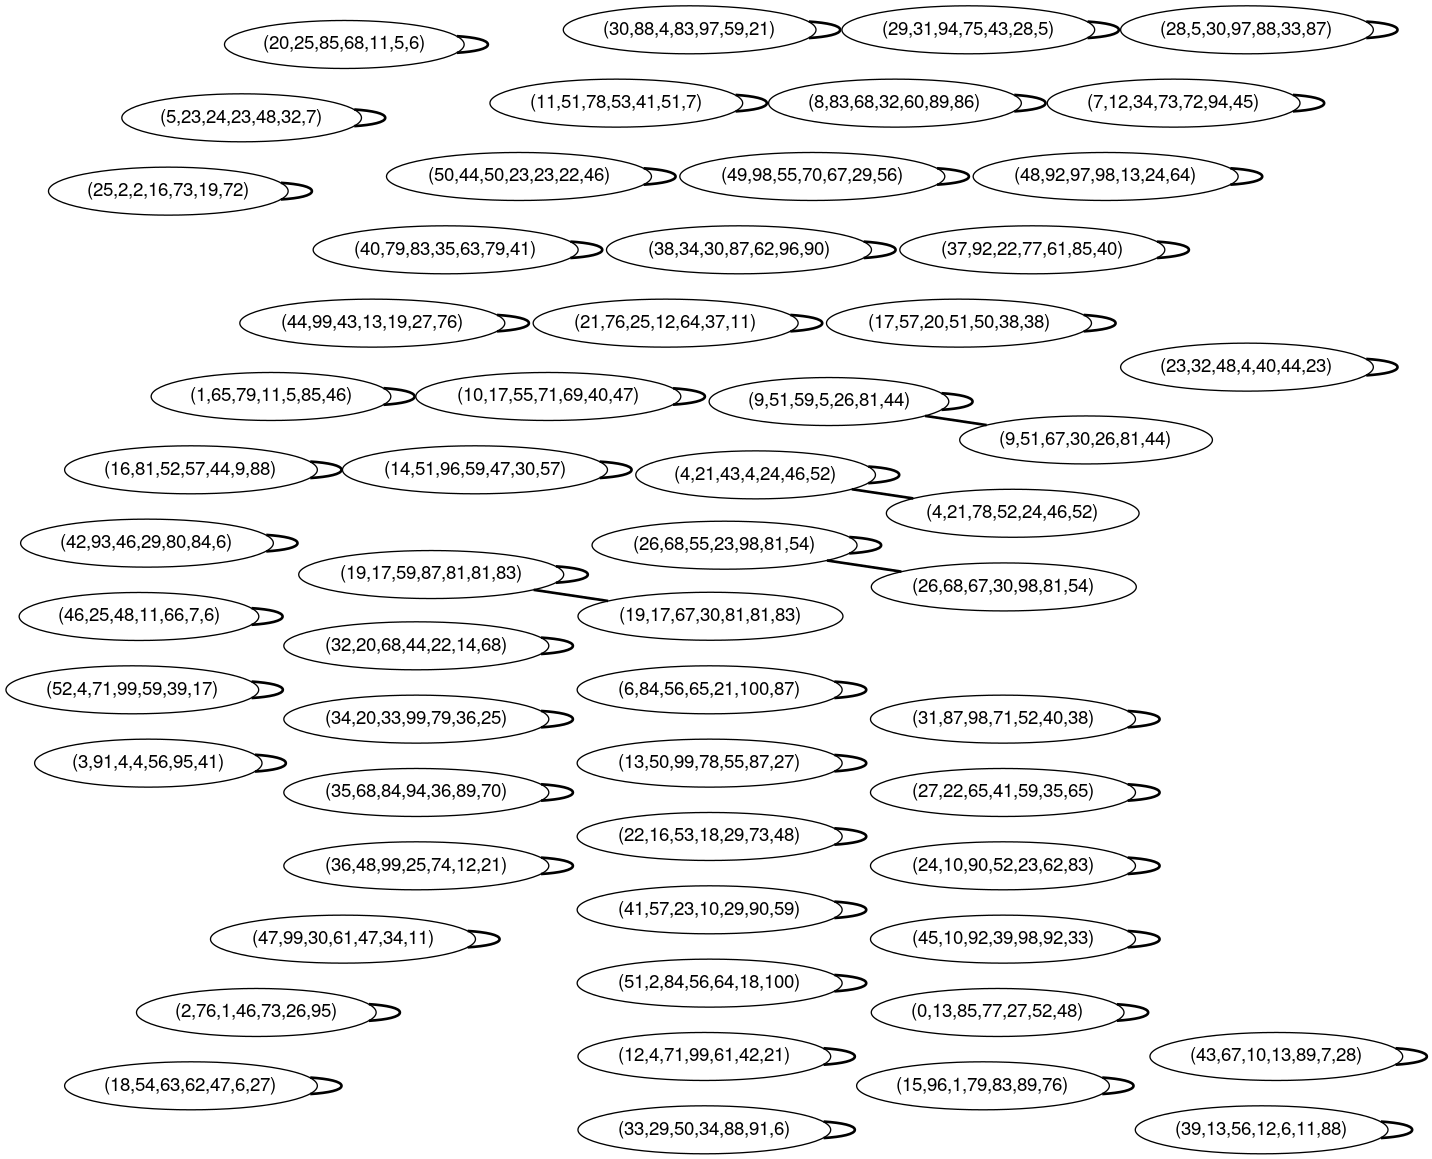

In [237]:
G = nx.Graph()

edges = []
start_col_names = ['ID','A0','A1','A2','A3','A4','A5']
end_col_names = ['ENDID','ENDA0','ENDA1','ENDA2','ENDA3','ENDA4','ENDA5']

startList = []
endList = []

for i, row in pw_rels_dfs[edge_rel_name].iterrows():
    start_node = '('+"{}".format(','.join([row[col] for col in start_col_names]))+')'
    end_node = '('+"{}".format(','.join([row[col] for col in end_col_names]))+')'
    startList.append(start_node)
    endList.append(end_node)
    G.add_edge(start_node, end_node, penwidth=2,color=row['COLOUR'])
    edges.append((start_node, end_node))
for node in G.nodes: G.nodes[node]['fontname'] = 'Helvetica'
G.graph['layout'] = 'fdp'

draw(G)
    
# G.graph['rankdir'] = 'TB'

In [5]:
q = "UPDATE configs SET %s WHERE id = :cid"

In [6]:
allkeys = ['KEY','KEY','key']

allkeys =  [N_D: 50, N_q: 10, N_dim: 6, idx: 0.5]

args = ", ".join(["%s = :%s" % (k.lower(), k) for k in allkeys])
q = q % args

In [7]:
q

'UPDATE configs SET key = :KEY, key = :KEY, key = :key WHERE id = :cid'

In [8]:
from configgen import KeyValue

ModuleNotFoundError: No module named 'configgen'